In [16]:
import os
import configparser
import pandas as pd
import re
import openpyxl

In [27]:
#Importing dataset
df = pd.read_csv('data/twitter_partial_cleaning.csv')
df = df.drop_duplicates().reset_index()
print(df.shape)
df.tail()

(2338, 4)


index       user_id    user_location  \
2333   4105  2.961228e+08   Cincinnati, OH   
2334   4106  8.800000e+17  Los Angeles, CA   
2335   4111  1.153059e+09    Princeton, KY   
2336   4116  2.432869e+08       Tucson, AZ   
2337   4118  2.159799e+09      Kansas City   

                                               user_bio  
2333  Christian. Husband. Father. Ph.D. Candidate @B...  
2334  MarTech, MBA, Foodie, Bilingual, Soccer, Boxin...  
2335  streams occasionally, will choose race cars ov...  
2336  Enjoy the practical wisdom of daily life. Prom...  
2337                                    glass half full

In [28]:

# drop all those rows which 
# have any 'nan' value in it

df.dropna(inplace = True)
df['user_bio'] = df['user_bio'].astype('string')



In [29]:
df['user_bio']

0       #TrueToAtlanta...ATL Braves 21 🏆 ATLUTD⭐️ ...2...
1       I'm a nerdy guy who loves art, music, wrestlin...
2       No worries Lil Ms Sunshine cause I don't mess ...
3       Fuck yo feelings!
Follow me please, I follow b...
4       I am a huge sports and music fan. I graduated ...
                              ...                        
2333    Christian. Husband. Father. Ph.D. Candidate @B...
2334    MarTech, MBA, Foodie, Bilingual, Soccer, Boxin...
2335    streams occasionally, will choose race cars ov...
2336    Enjoy the practical wisdom of daily life. Prom...
2337                                      glass half full
Name: user_bio, Length: 2338, dtype: string

## Text pre-processing

In [30]:
df['hashtag'] = df['user_bio'].apply(lambda x: re.findall(r"#(\w+)", x))

In [31]:
from bio_preprocessor import tokenize_bios

df = tokenize_bios(df)
df.head(5)

Complete. Number of bios that have been cleaned and tokenized : 2338


index       user_id                 user_location  \
0      0  3.436262e+08                           USA   
1      1  1.180000e+18                 Cleveland, OH   
2      2  1.440000e+18                 Harrisburg Pa   
3      3  3.169218e+09  Houston, TX, USA, The Ghetto   
4      4  1.219720e+08                    Denver, CO   

                                            user_bio  \
0  #TrueToAtlanta...ATL Braves 21 🏆 ATLUTD⭐️ ...2...   
1  I'm a nerdy guy who loves art, music, wrestlin...   
2  No worries Lil Ms Sunshine cause I don't mess ...   
3  Fuck yo feelings!
Follow me please, I follow b...   
4  I am a huge sports and music fan. I graduated ...   

                                     hashtag  \
0                   [TrueToAtlanta, GoDawgs]   
1                                         []   
2                                         []   
3  [lgbtq, feminist, blacklivesmatter, Army]   
4                                         []   

                                              tokens  
0              atl brave atlutd orange bowl playoffs  
1       nerdy guy love art music wrestle comics poly  
2  worry lil sunshine cause mess woman moon civil...  
3  fuck feel follow follow atl bear nigerian rais...  
4  huge sport music fan graduate regis university...

In [32]:
from ekphrasis.classes.segmenter import Segmenter

# segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")
a = []
for i in range(len(df)):
    if df['hashtag'][i] != a:
        listToStr1 = ' '.join([str(elem) for elem in \
                                       df['hashtag'][i]])
        df.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)
    else:
        df.loc[i,'Segmented#'] = ""

Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [35]:
df.to_csv(r'data/step2_preprocessed_bios.csv', index = False,   
                 header=True)

In [36]:
df

index       user_id                 user_location  \
0         0  3.436262e+08                           USA   
1         1  1.180000e+18                 Cleveland, OH   
2         2  1.440000e+18                 Harrisburg Pa   
3         3  3.169218e+09  Houston, TX, USA, The Ghetto   
4         4  1.219720e+08                    Denver, CO   
...     ...           ...                           ...   
2333   4105  2.961228e+08                Cincinnati, OH   
2334   4106  8.800000e+17               Los Angeles, CA   
2335   4111  1.153059e+09                 Princeton, KY   
2336   4116  2.432869e+08                    Tucson, AZ   
2337   4118  2.159799e+09                   Kansas City   

                                               user_bio  \
0     #TrueToAtlanta...ATL Braves 21 🏆 ATLUTD⭐️ ...2...   
1     I'm a nerdy guy who loves art, music, wrestlin...   
2     No worries Lil Ms Sunshine cause I don't mess ...   
3     Fuck yo feelings!
Follow me please, I follow b...   
4     I am a huge sports and music fan. I graduated ...   
...                                                 ...   
2333  Christian. Husband. Father. Ph.D. Candidate @B...   
2334  MarTech, MBA, Foodie, Bilingual, Soccer, Boxin...   
2335  streams occasionally, will choose race cars ov...   
2336  Enjoy the practical wisdom of daily life. Prom...   
2337                                    glass half full   

                                        hashtag  \
0                      [TrueToAtlanta, GoDawgs]   
1                                            []   
2                                            []   
3     [lgbtq, feminist, blacklivesmatter, Army]   
4                                            []   
...                                         ...   
2333                                [ChelseaFC]   
2334                                 [FairPlay]   
2335                                         []   
2336                                         []   
2337                                         []   

                                                 tokens  \
0                 atl brave atlutd orange bowl playoffs   
1          nerdy guy love art music wrestle comics poly   
2     worry lil sunshine cause mess woman moon civil...   
3     fuck feel follow follow atl bear nigerian rais...   
4     huge sport music fan graduate regis university...   
...                                                 ...   
2333  christian husband father candidate mosquito re...   
2334  martech mba foodie bilingual soccer box gamer ...   
2335  stream occasionally choose race cars important...   
2336  enjoy practical wisdom daily life promote trut...   
2337                                         glass half   

                                 Segmented#  
0                 true to atlanta  go dawgs  
1                                            
2                                            
3     lgbtq feminist blacklivesmatter  army  
4                                            
...                                     ...  
2333                             chelsea fc  
2334                              fair play  
2335                                         
2336                                         
2337                                         

[2338 rows x 7 columns]

### Frequency of words in the token column

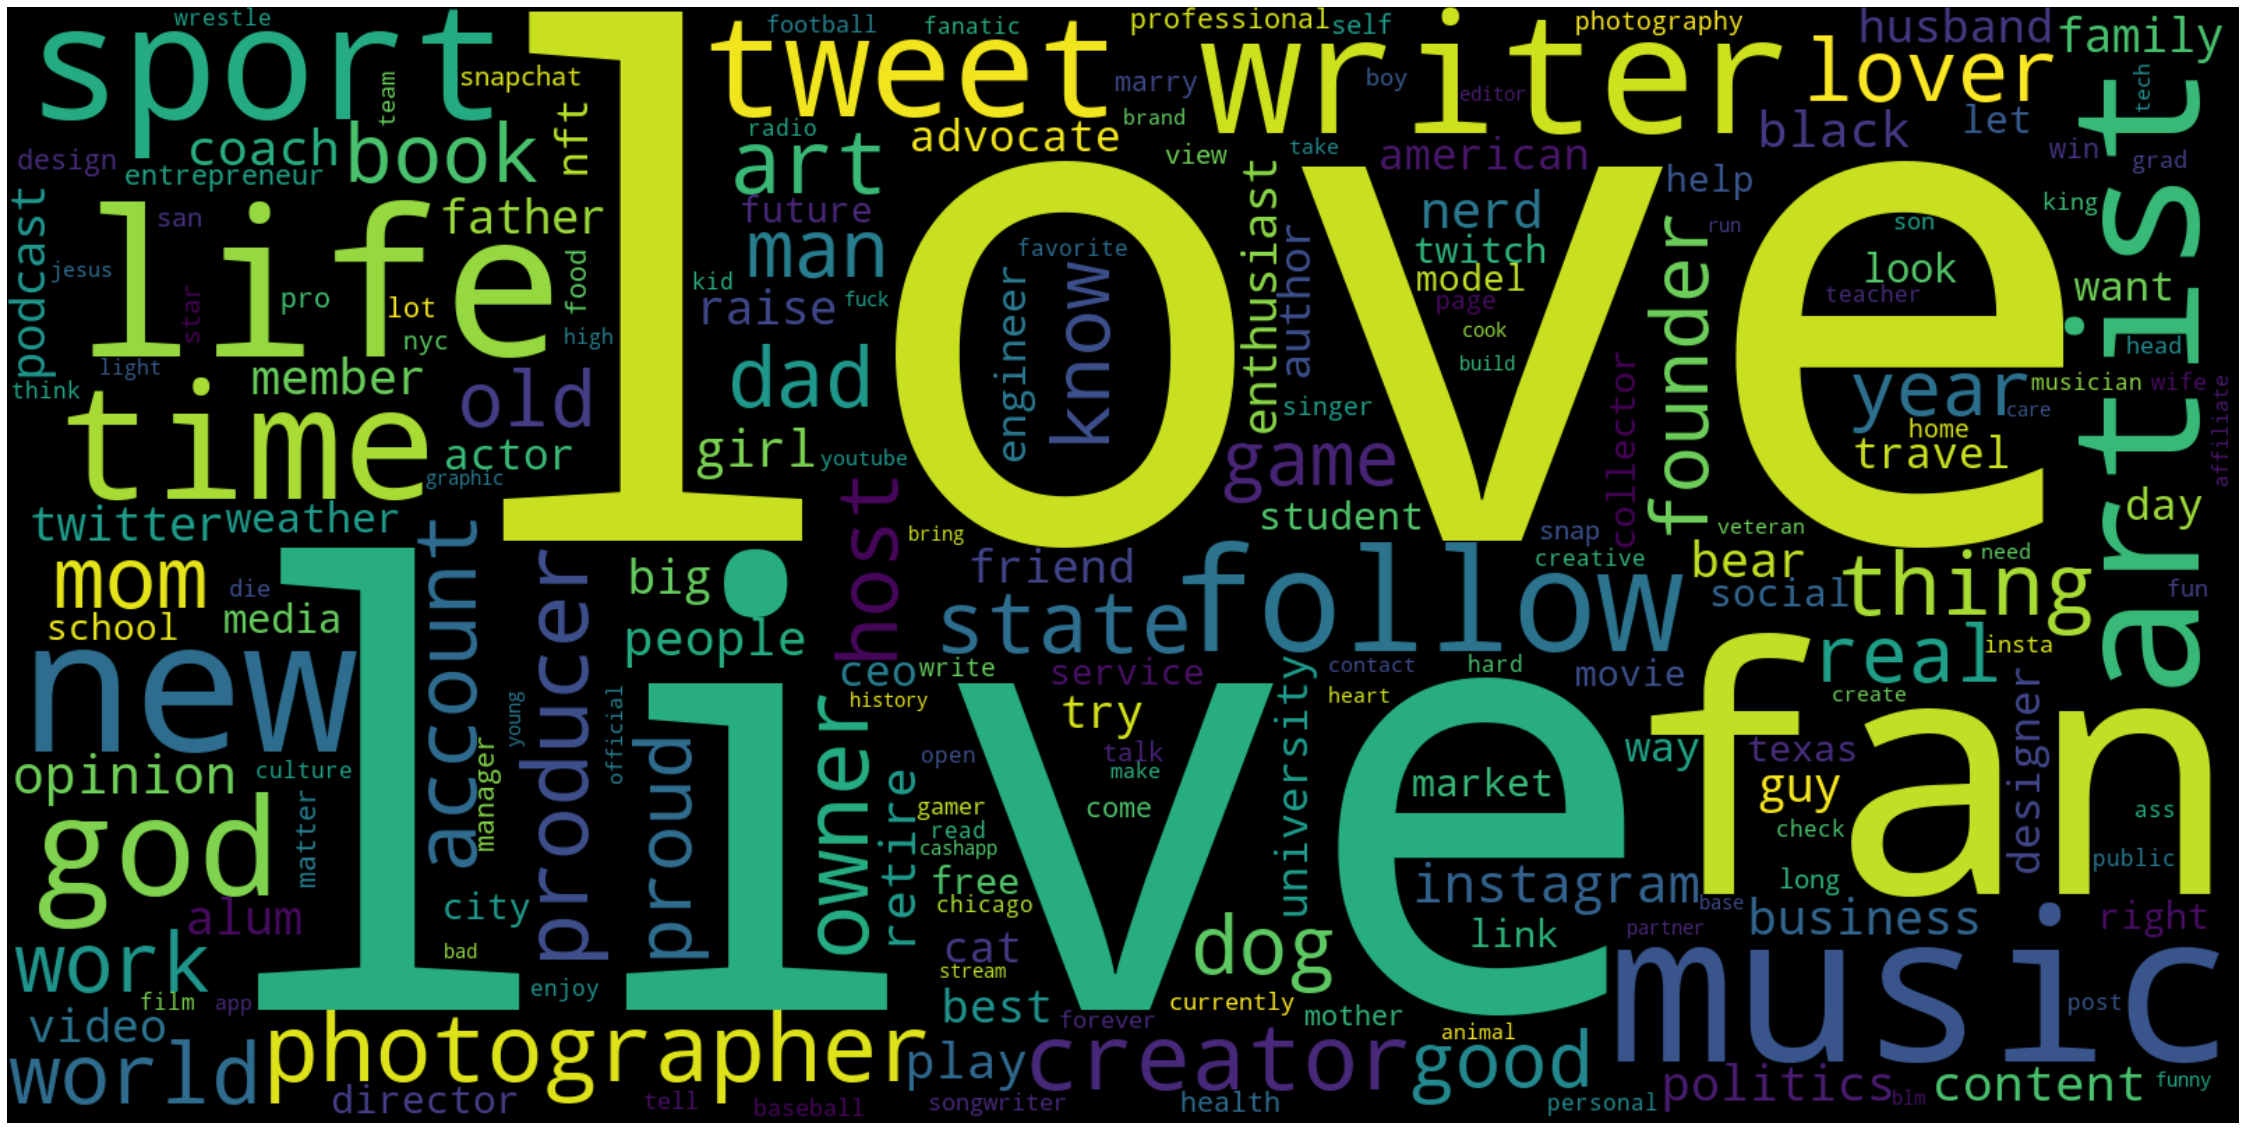

In [39]:
#Frequency of words
from wordcloud import WordCloud
from nltk import FreqDist
import matplotlib.pyplot as plt


string = pd.Series(df['tokens']).str.cat(sep=' ')


#WordCloud
wordcloud = WordCloud(width=1600,height=800,max_words = 200,max_font_size=500,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


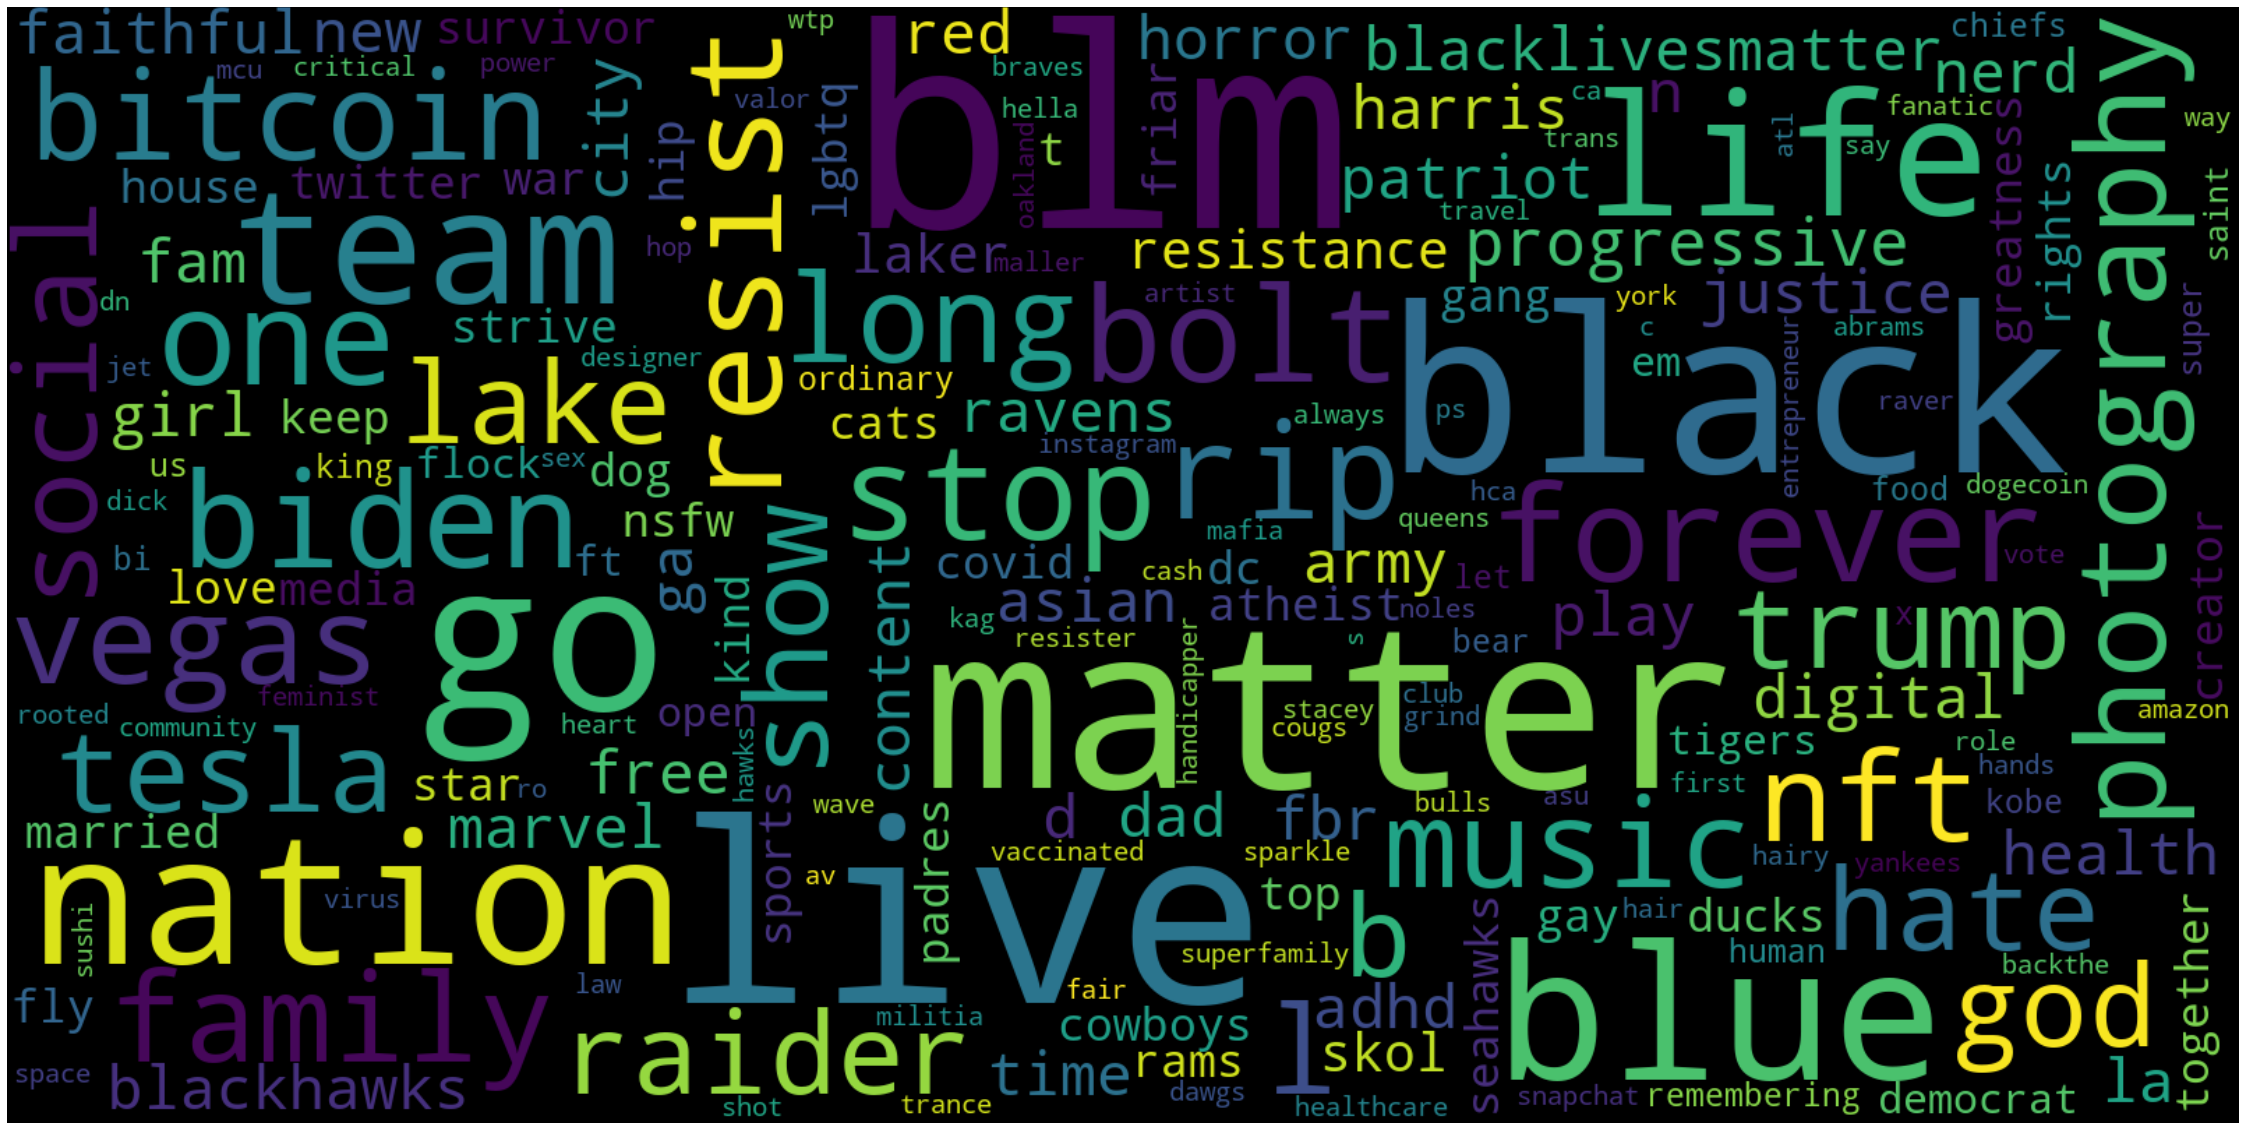

In [40]:
hashtags = pd.Series(df['Segmented#']).str.cat(sep=' ')


#WordCloud
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,collocations=False, background_color='black').generate(hashtags)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
